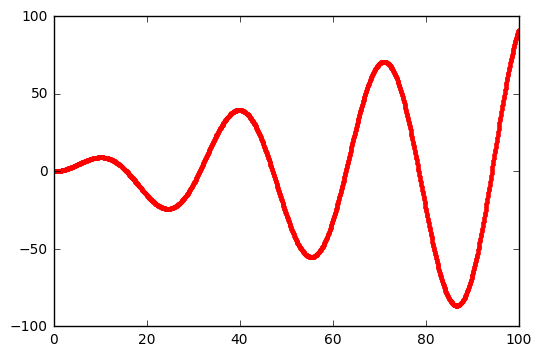

In [30]:
import numpy as np
import tensorflow as tf
import tflearn
import keras
import matplotlib.pyplot as plt

%matplotlib inline

t = np.linspace(0, 100, 1000)
x1 = np.power(t,1)
x2 = np.random.randn(len(t)) 
y = np.sin( x1 / 5 ) * x1

#y = np.array([np.sum(y[0:i]) for i in range(len(y))])

trainX = np.stack((x1, x2), axis = 1)
trainY = y
plt.plot(x1, y, 'r.')
#plt.plot(x1, y2, 'b.')

Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 16s - loss: 1518.0951 - val_loss: 1725.1325
Epoch 2/100
800/800 [==============================] - 9s - loss: 1467.8837 - val_loss: 1670.3059
Epoch 3/100
800/800 [==============================] - 10s - loss: 1386.1136 - val_loss: 1640.9453
Epoch 4/100
800/800 [==============================] - 11s - loss: 1322.6017 - val_loss: 1479.8737
Epoch 5/100
800/800 [==============================] - 9s - loss: 1326.5838 - val_loss: 1470.4676
Epoch 6/100
800/800 [==============================] - 9s - loss: 1249.9778 - val_loss: 1431.6157
Epoch 7/100
800/800 [==============================] - 11s - loss: 1180.3547 - val_loss: 1419.4970
Epoch 8/100
800/800 [==============================] - 11s - loss: 1184.6783 - val_loss: 1400.6613
Epoch 9/100
800/800 [==============================] - 9s - loss: 1148.7861 - val_loss: 1395.2819
Epoch 10/100
800/800 [==============================] - 12s - loss:

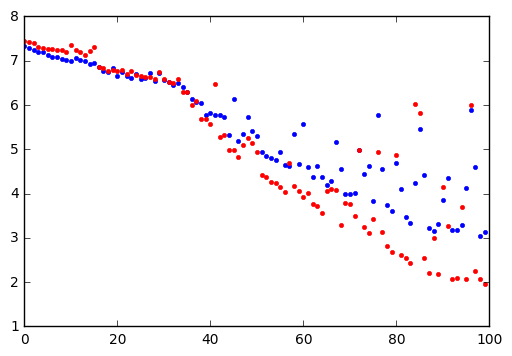

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit( trainX )
trainXscaled = scaler.transform(trainX)

timesteps = 5
batch_size_ = 4

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps, 2)),
    LSTM(60),
    #LSTM(100),
    Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='adam')

lstmTrainX = np.zeros([trainXscaled.shape[0], timesteps, 2])
lstmTrainY = np.zeros(trainXscaled.shape[0])

for i in range(timesteps, trainXscaled.shape[0]):
    lstmTrainX[i, :, :] = trainX[i-timesteps:i,:]
    lstmTrainY[i] = trainY[i]

from sklearn.utils import shuffle
lstmTrainX, lstmTrainY = shuffle(lstmTrainX, lstmTrainY)

hist = model.fit(lstmTrainX, lstmTrainY, nb_epoch=100, batch_size=batch_size_, verbose = 1, validation_split=0.2, shuffle=True)

plt.plot(np.log(hist.history['loss']), 'b.')
plt.plot(np.log(hist.history['val_loss']), 'r.')
plt.show()


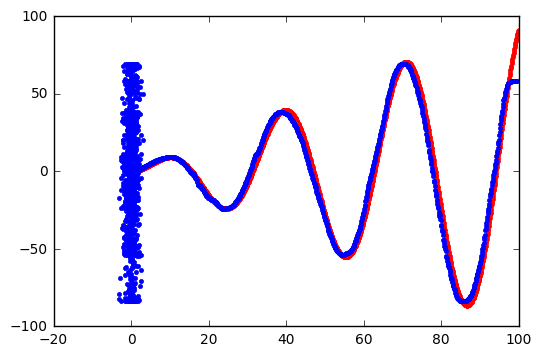

In [35]:
predY = model.predict(lstmTrainX, batch_size = 2)
plt.plot(x1, y, 'r.')
plt.plot(lstmTrainX[0:,0], predY[0:], 'b.')